In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

# Project Summary : Business Case Analysis:
## Data Requirement: 
   - The data is given in an excel file and is about a data analytics firm, whose employee performance indexes are coming down, and customer satisfaction levels are declining. 
   - To be able to take any remedial measures, the factors affecting the poor performance and to be able to predict if a employee is poorly performing or not based on the attributes, is to be determined.
   - Seeking the help of ML, we are asked to develop a model that analyses the current employees and figures out the causes/factors of poorer performances. Additionally,the model can be designed to predict if a employee is underperforming or not and the rating of performance.
   - Insights expected from the project are as given:
        1. Department wise performances
        2. Top 3 Important Factors effecting employee performance
        3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
        4. Recommendations to improve the employee performance based on insights from analysis.

## Data Loading and basic checks

In [2]:
#Load data from excel
data = pd.read_excel('/Users/subbalakshmivedam/Desktop/datascience projects/IABAC/data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [3]:
#See the data
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [4]:
#Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

## Visualization:

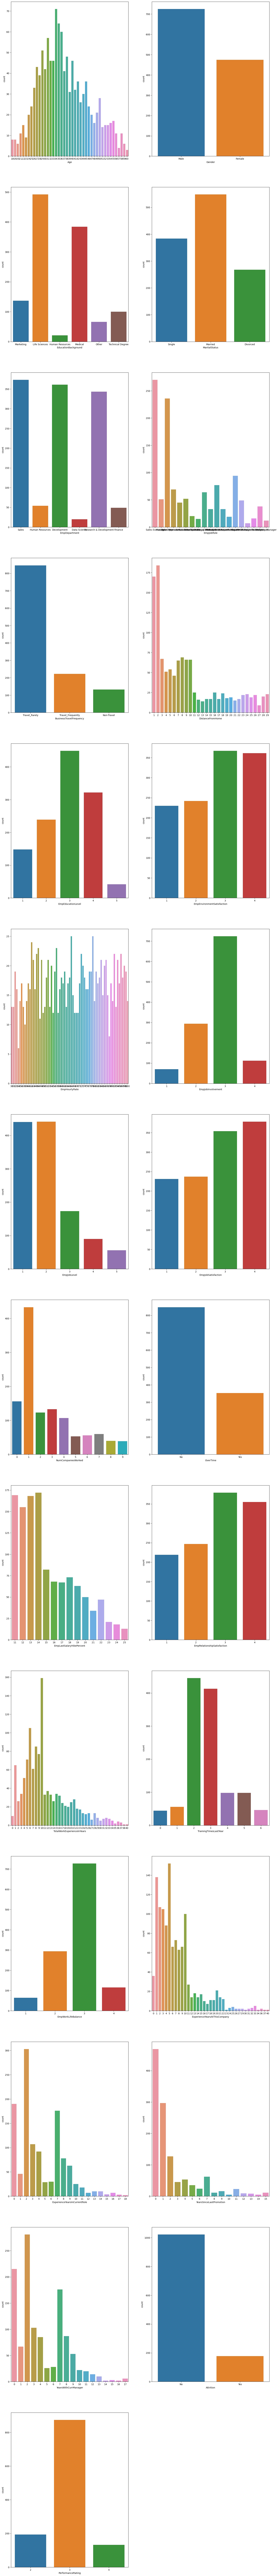

In [5]:
#Since most variables have limited spread, its easy to have count plots of all data.
#Code to plot countplot all data features
plt.figure(figsize=(20,200))
plt_num = 1
for i in data.columns[1:]:
    plt.subplot(14,2,plt_num)
    sns.countplot(data[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt_num+=1

<AxesSubplot:xlabel='EmpJobRole', ylabel='count'>

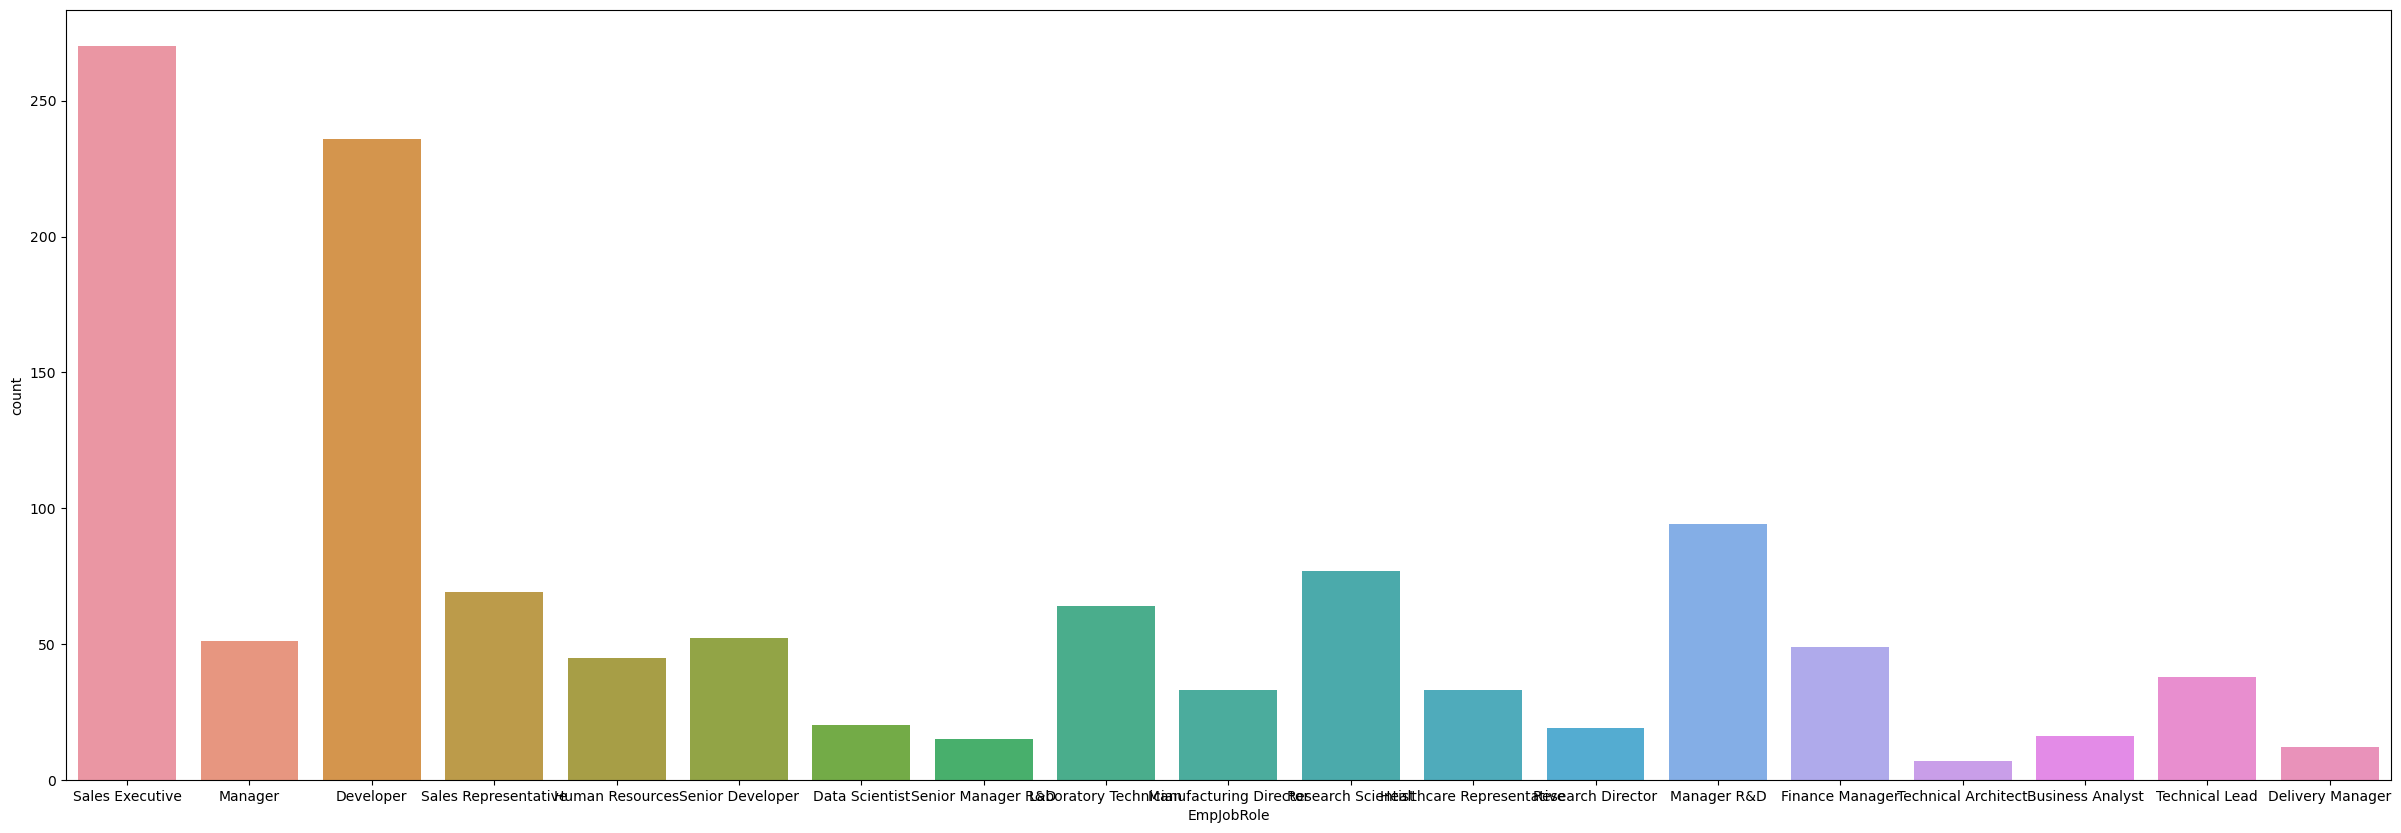

In [6]:
#Plotting empjob role separately as its not interpretable in the lot
plt.figure(figsize=(30,10))
sns.countplot(data.EmpJobRole)

In [7]:
#Bivariate analysis 
#Since the spread is limited, countplot with a hue will give us analysis of all featues with respect to target
plt.figure(figsize=(20,400))
plt_num = 1
for i in data.columns[1:(len(data.columns)-1)]:
    plt.subplot(26,1,plt_num)
    sns.countplot(data[i],hue=data.PerformanceRating)
    plt.xlabel(i)
    plt.ylabel('count')
    plt_num+=1

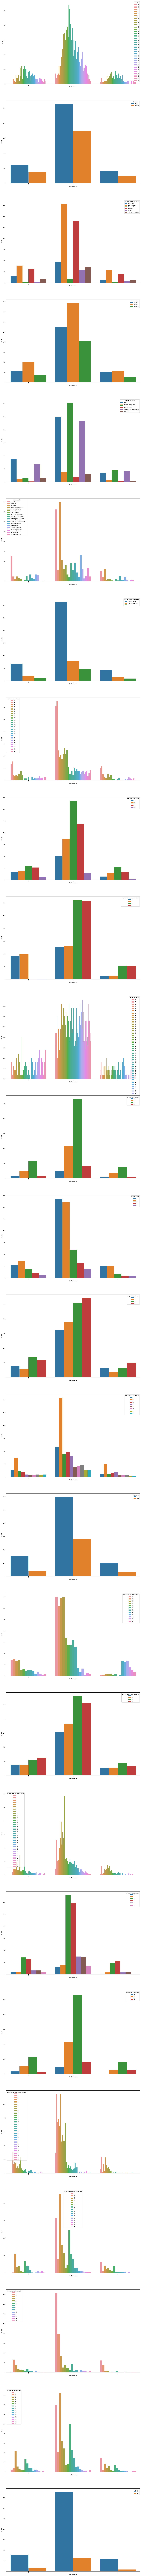

In [8]:
#Bivariate analysis 
plt.figure(figsize=(20,400))
plt_num = 1
for i in data.columns[1:(len(data.columns)-1)]:
    plt.subplot(27,1,plt_num)
    sns.countplot(data.PerformanceRating,hue=data[i])
    plt.xlabel('Performance')
    plt.ylabel('count')
    plt_num+=1

<AxesSubplot:xlabel='EmpDepartment', ylabel='count'>

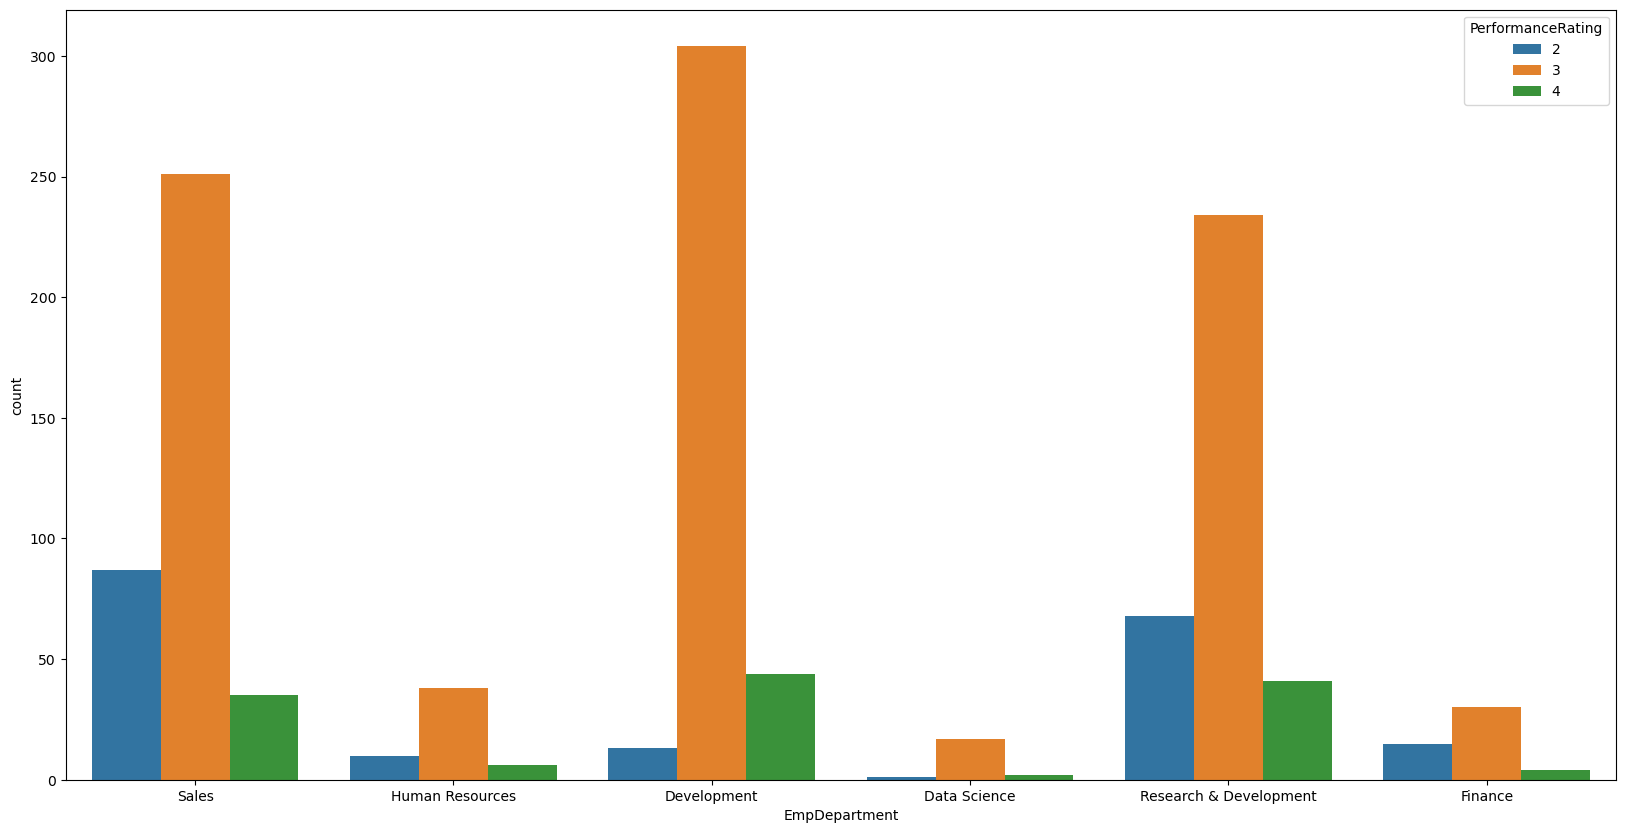

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(data.EmpDepartment, hue=data.PerformanceRating)

In [10]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

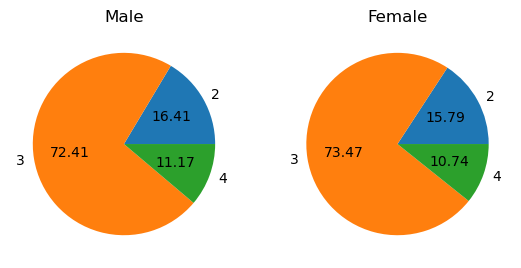

In [11]:
plt.figure(figsize=(10,20))
plt_num = 1
for i in data.Gender.unique():
        plt.subplot(math.ceil(len(data.Gender.unique())/3),3,plt_num)
        plt.pie(data.loc[data.Gender == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.Gender == i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
        plt.title(i)
        plt_num+=1

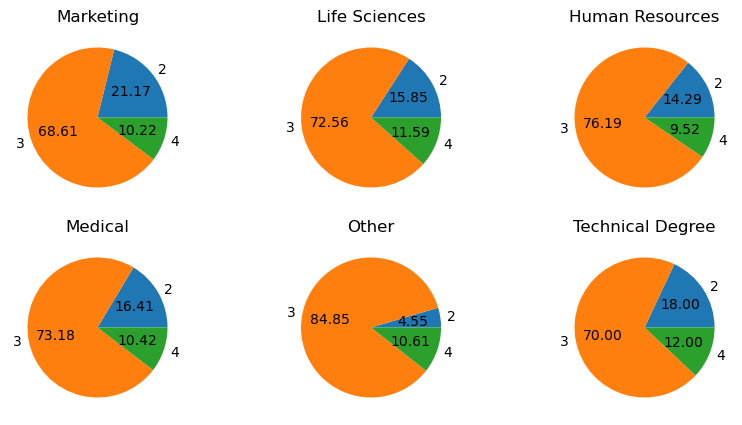

In [12]:
plt.figure(figsize=(10,5))
plt_num = 1
for i in data.EducationBackground.unique():
    plt.subplot(math.ceil(len(data.EducationBackground.unique())/3),3,plt_num)
    plt.pie(data.loc[data.EducationBackground == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.EducationBackground == i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

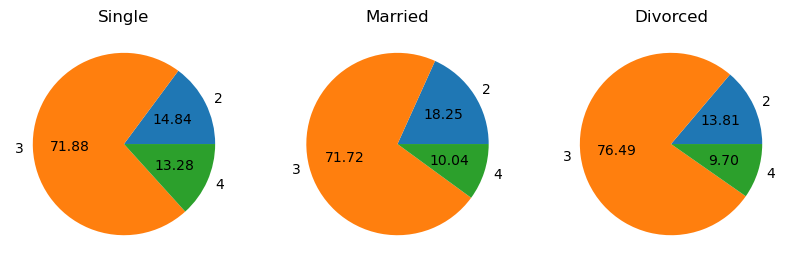

In [13]:
plt.figure(figsize=(10,10))
plt_num = 1
for i in data.MaritalStatus.unique():
    plt.subplot(math.ceil(len(data.MaritalStatus.unique())/3),3,plt_num)
    plt.pie(data.loc[data.MaritalStatus == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.MaritalStatus == i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

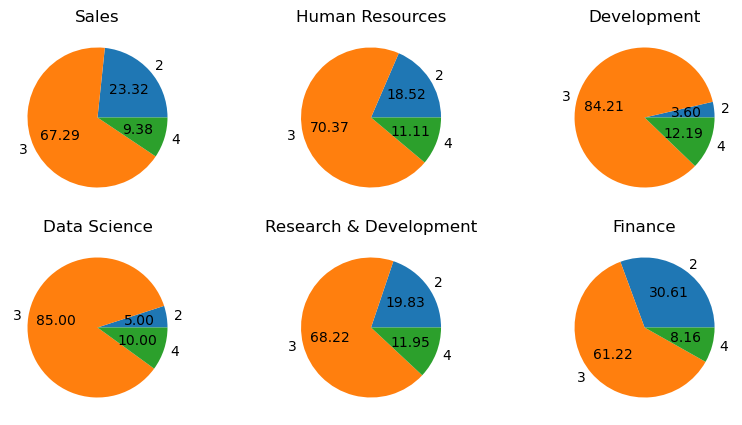

In [14]:
plt.figure(figsize=(10,5))
plt_num = 1
for i in data.EmpDepartment.unique():
    plt.subplot(math.ceil(len(data.EmpDepartment.unique())/3),3,plt_num)
    plt.pie(data.loc[data.EmpDepartment == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.EmpDepartment == i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

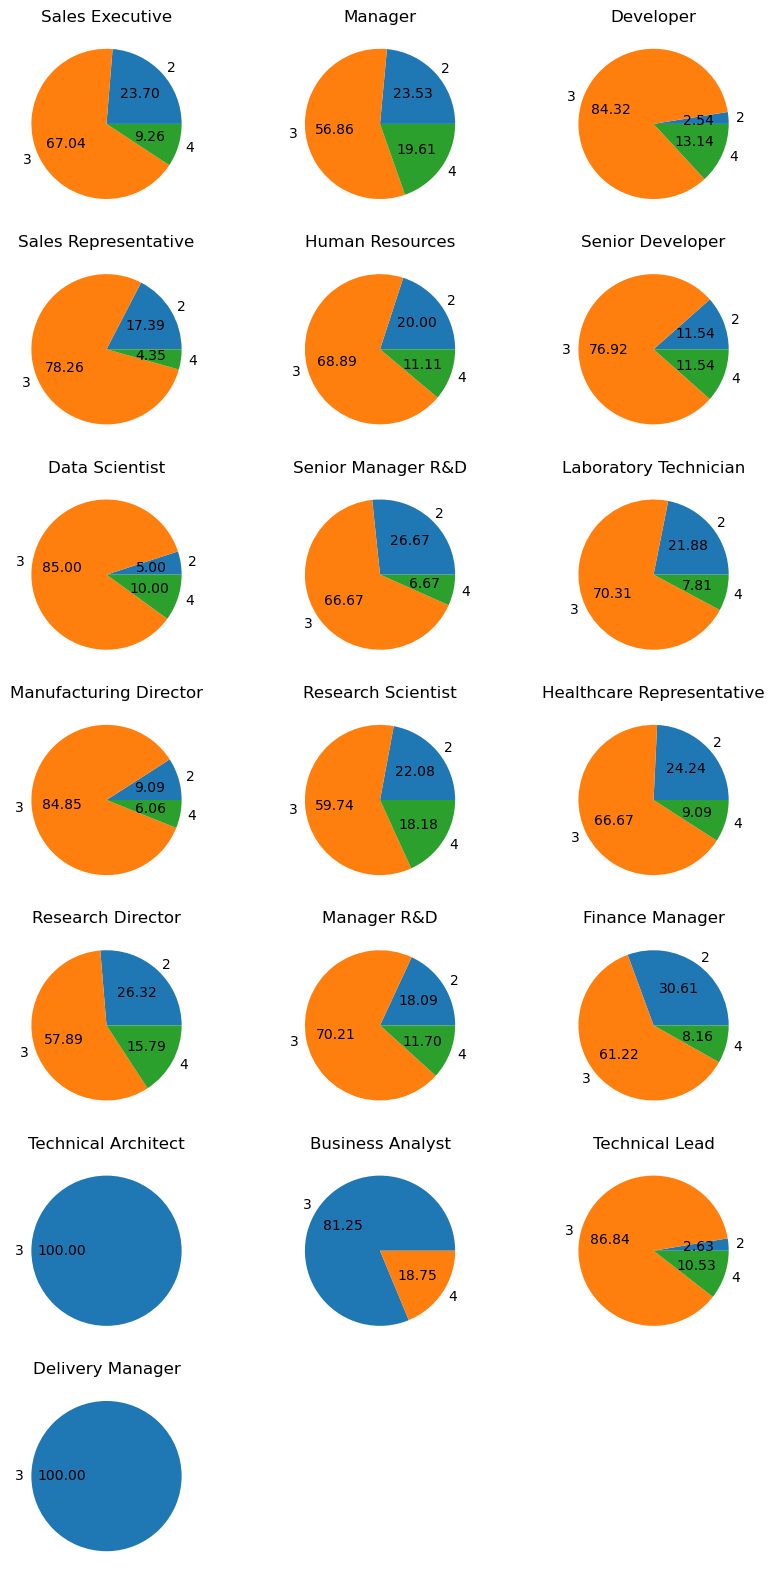

In [15]:
plt.figure(figsize=(10,20))
plt_num = 1
for i in data.EmpJobRole.unique():
    plt.subplot(math.ceil(len(data.EmpJobRole.unique())/3),3,plt_num)
    plt.pie(data.loc[data.EmpJobRole == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.EmpJobRole == i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

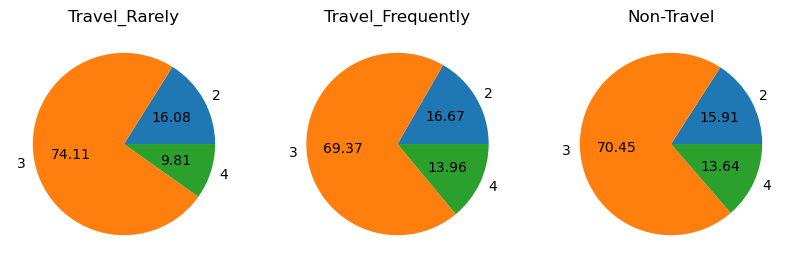

In [16]:
plt.figure(figsize=(10,20))
plt_num = 1
for i in data.BusinessTravelFrequency.unique():
    plt.subplot(math.ceil(len(data.BusinessTravelFrequency.unique())/3),3,plt_num)
    plt.pie(data.loc[data.BusinessTravelFrequency == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.BusinessTravelFrequency == i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

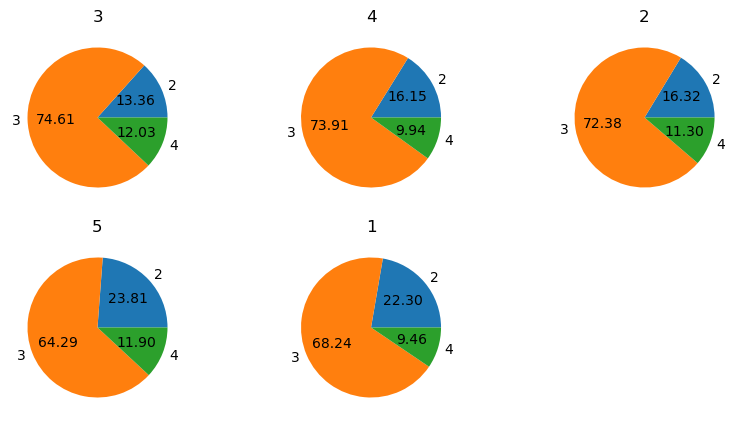

In [17]:
plt.figure(figsize=(10,5))
plt_num = 1
for i in data.EmpEducationLevel.unique():
    plt.subplot(math.ceil(len(data.EmpEducationLevel.unique())/3),3,plt_num)
    plt.pie(data.loc[data.EmpEducationLevel == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.EmpEducationLevel == i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

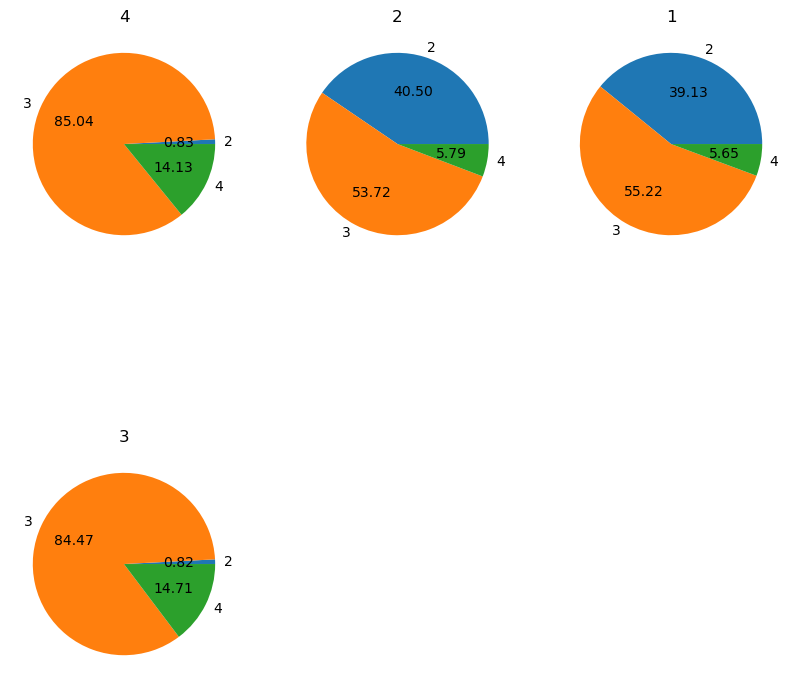

In [18]:
plt.figure(figsize=(10,10))
plt_num = 1
for i in data.EmpEnvironmentSatisfaction.unique():
    plt.subplot(math.ceil(len(data.EmpEnvironmentSatisfaction.unique())/3),3,plt_num)
    plt.pie(data.loc[data.EmpEnvironmentSatisfaction == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.EmpEnvironmentSatisfaction == i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

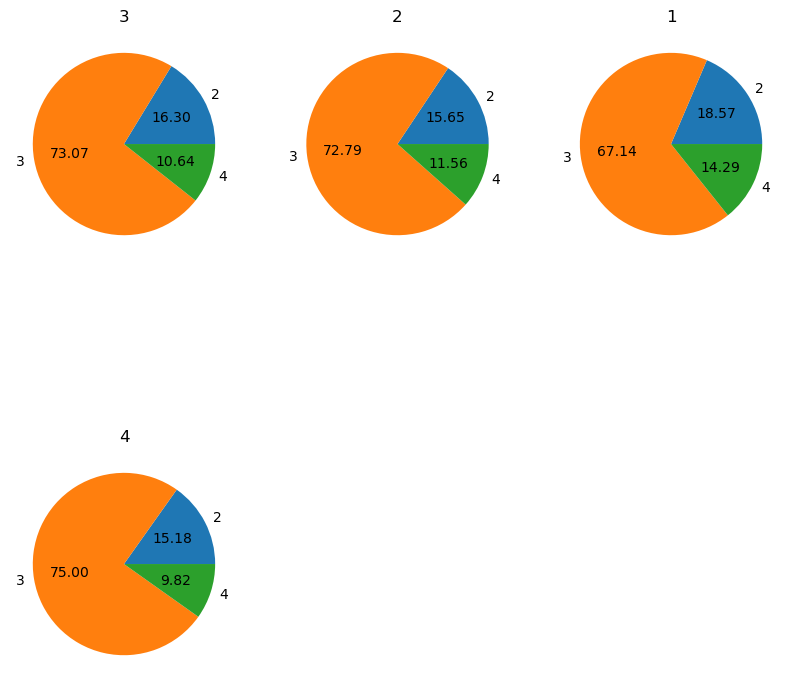

In [19]:
plt.figure(figsize=(10,10))
plt_num = 1
for i in data.EmpJobInvolvement.unique():
    plt.subplot(math.ceil(len(data.EmpJobInvolvement.unique())/3),3,plt_num)
    plt.pie(data.loc[data.EmpJobInvolvement == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.EmpJobInvolvement == i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

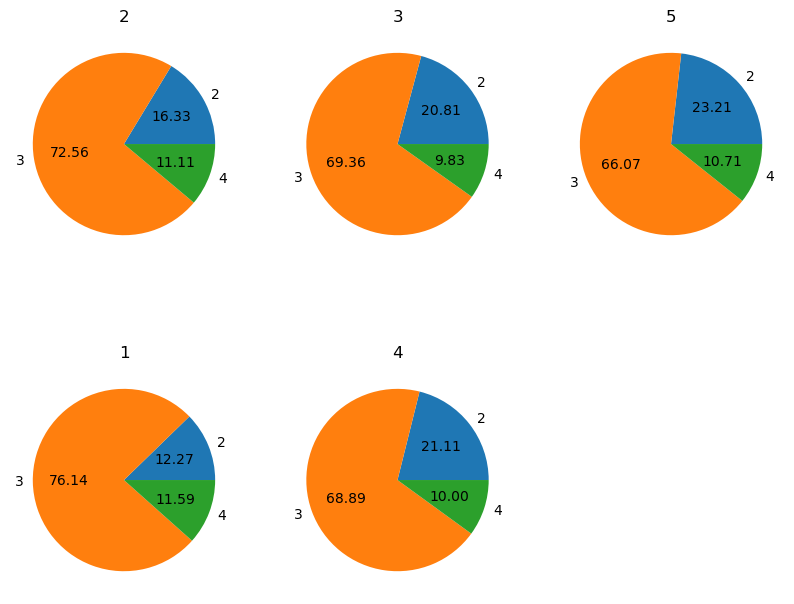

In [20]:
plt.figure(figsize=(10,8))
plt_num = 1
for i in data.EmpJobLevel.unique():
    plt.subplot(math.ceil(len(data.EmpJobLevel.unique())/3),3,plt_num)
    plt.pie(data.loc[data.EmpJobLevel== i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.EmpJobLevel == i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

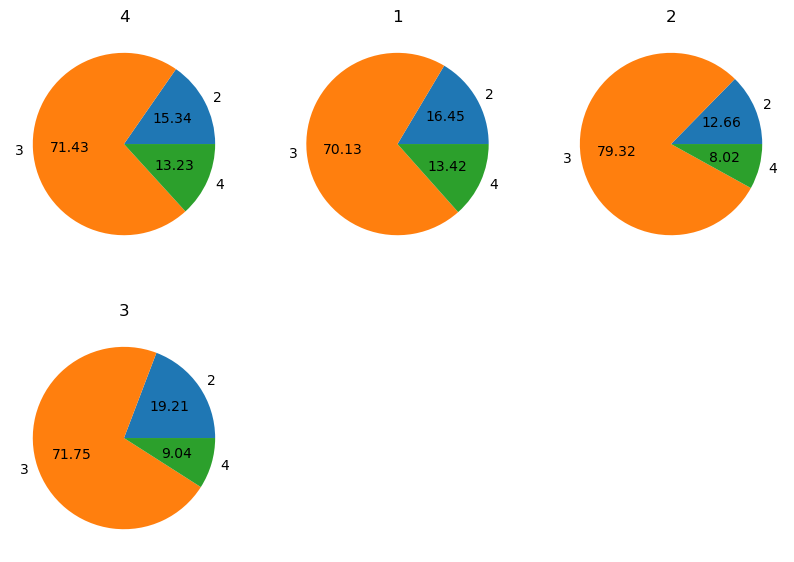

In [21]:
plt.figure(figsize=(10,7))
plt_num = 1
for i in data.EmpJobSatisfaction.unique():
    plt.subplot(math.ceil(len(data.EmpJobSatisfaction.unique())/3),3,plt_num)
    plt.pie(data.loc[data.EmpJobSatisfaction == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.EmpJobSatisfaction== i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

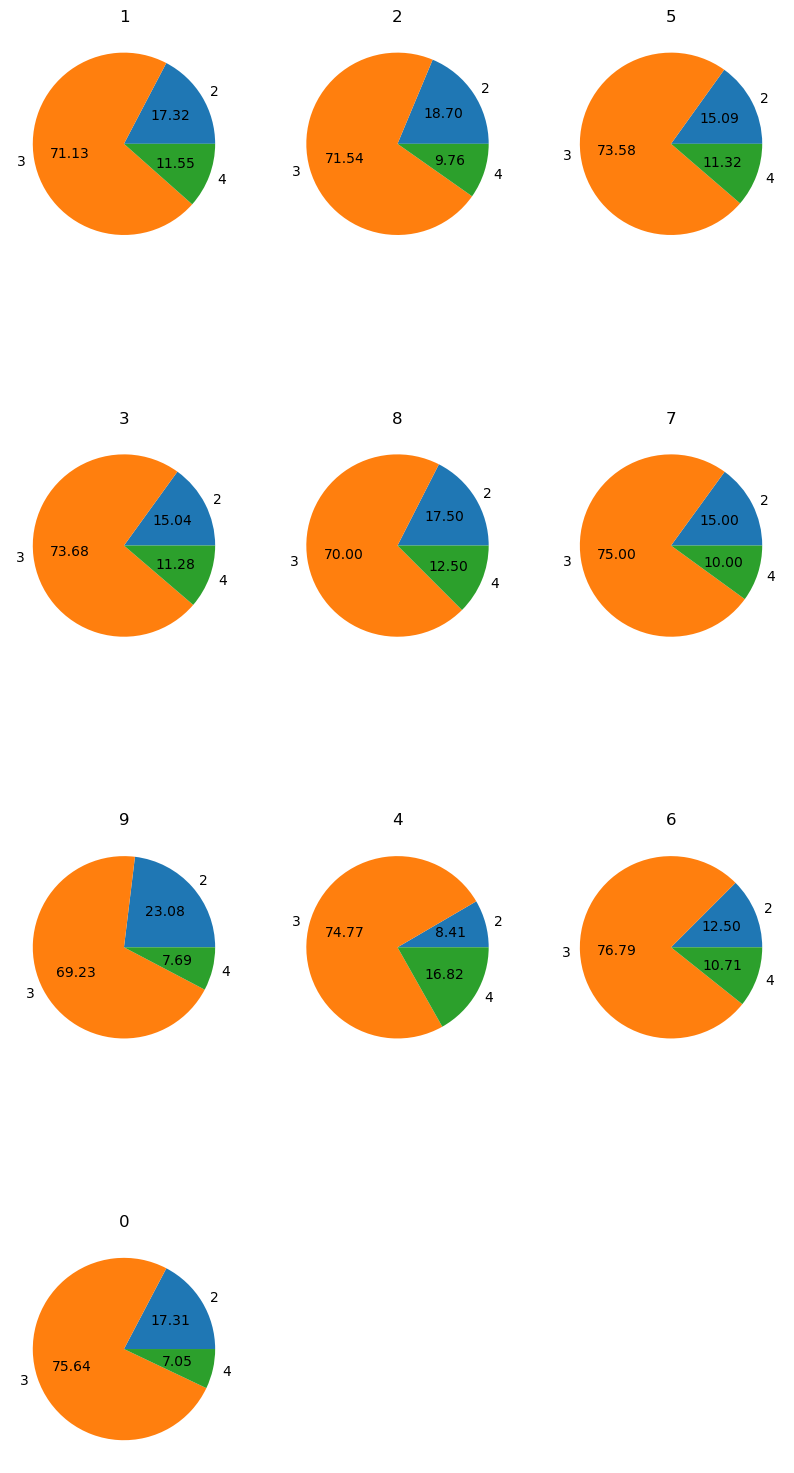

In [22]:
plt.figure(figsize=(10,20))
plt_num = 1
for i in data.NumCompaniesWorked.unique():
    plt.subplot(math.ceil(len(data.NumCompaniesWorked.unique())/3),3,plt_num)
    plt.pie(data.loc[data.NumCompaniesWorked == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.NumCompaniesWorked== i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

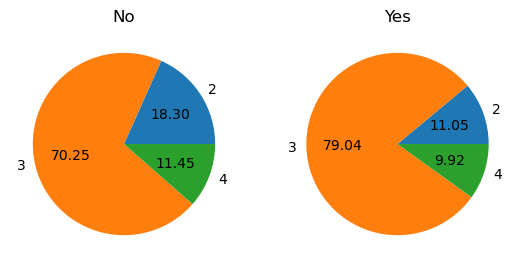

In [23]:
plt.figure(figsize=(10,7))
plt_num = 1
for i in data.OverTime.unique():
    plt.subplot(math.ceil(len(data.OverTime.unique())/3),3,plt_num)
    plt.pie(data.loc[data.OverTime == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.OverTime== i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

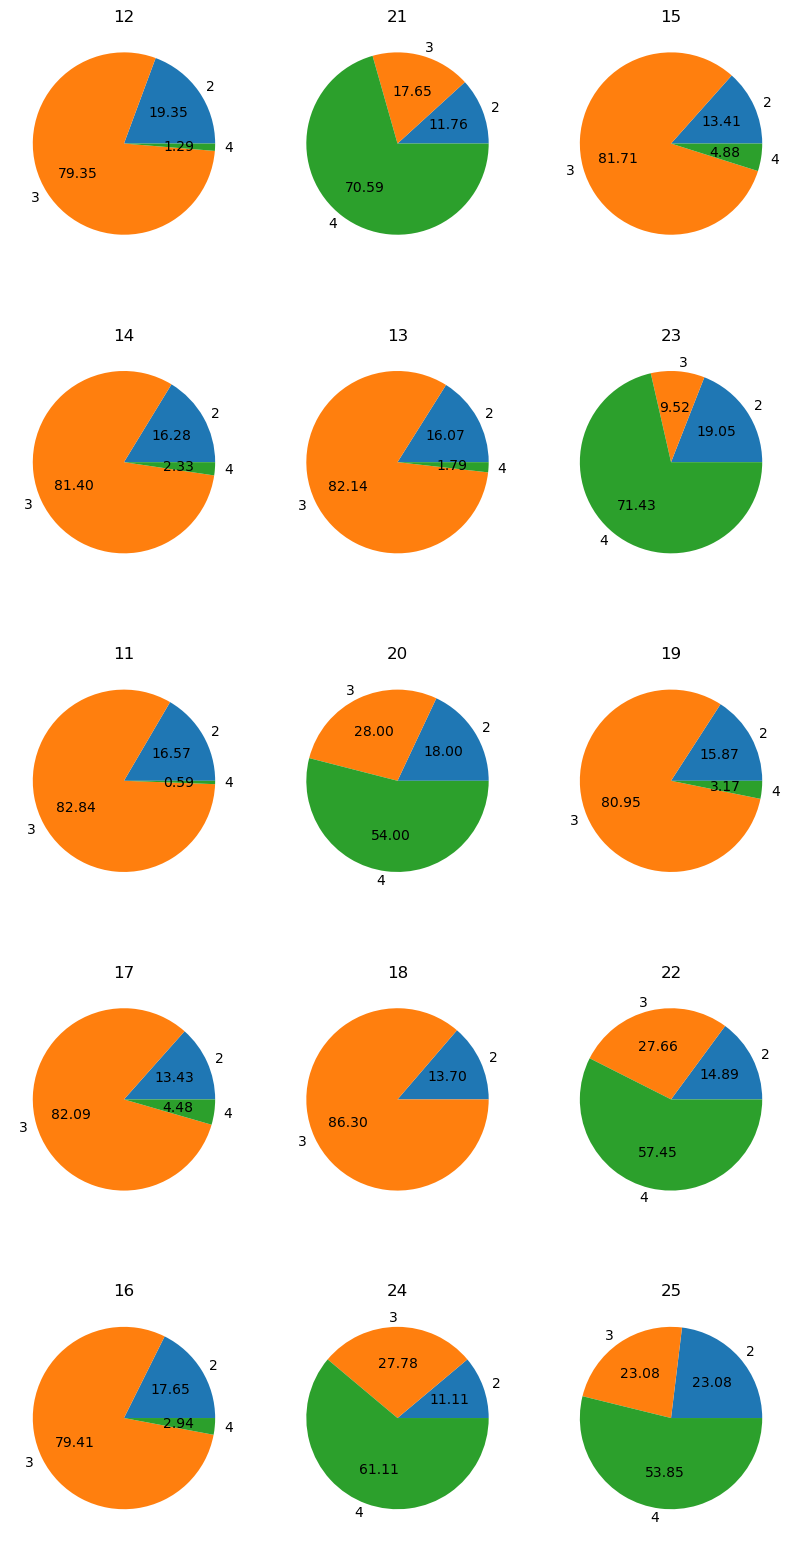

In [24]:
plt.figure(figsize=(10,20))
plt_num = 1
for i in data.EmpLastSalaryHikePercent.unique():
    plt.subplot(math.ceil(len(data.EmpLastSalaryHikePercent.unique())/3),3,plt_num)
    plt.pie(data.loc[data.EmpLastSalaryHikePercent == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.EmpLastSalaryHikePercent== i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

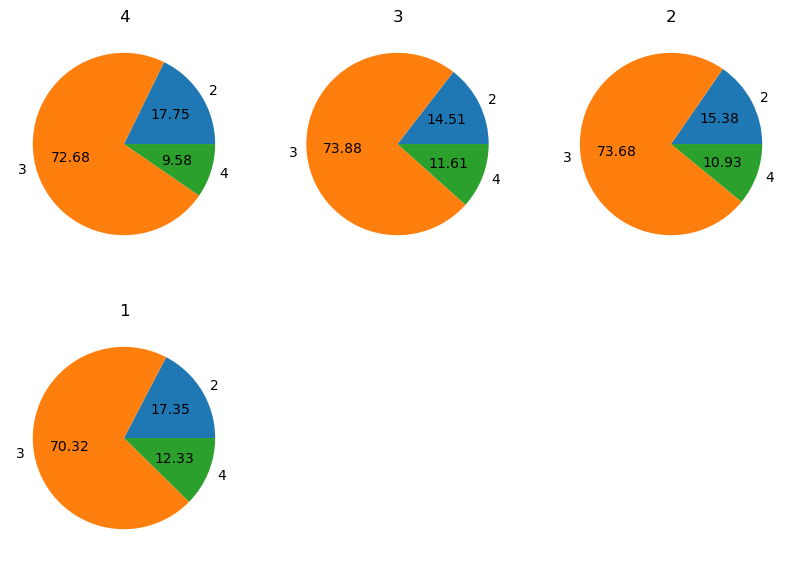

In [25]:
plt.figure(figsize=(10,7))
plt_num = 1
for i in data.EmpRelationshipSatisfaction.unique():
    plt.subplot(math.ceil(len(data.EmpRelationshipSatisfaction.unique())/3),3,plt_num)
    plt.pie(data.loc[data.EmpRelationshipSatisfaction == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.EmpRelationshipSatisfaction== i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

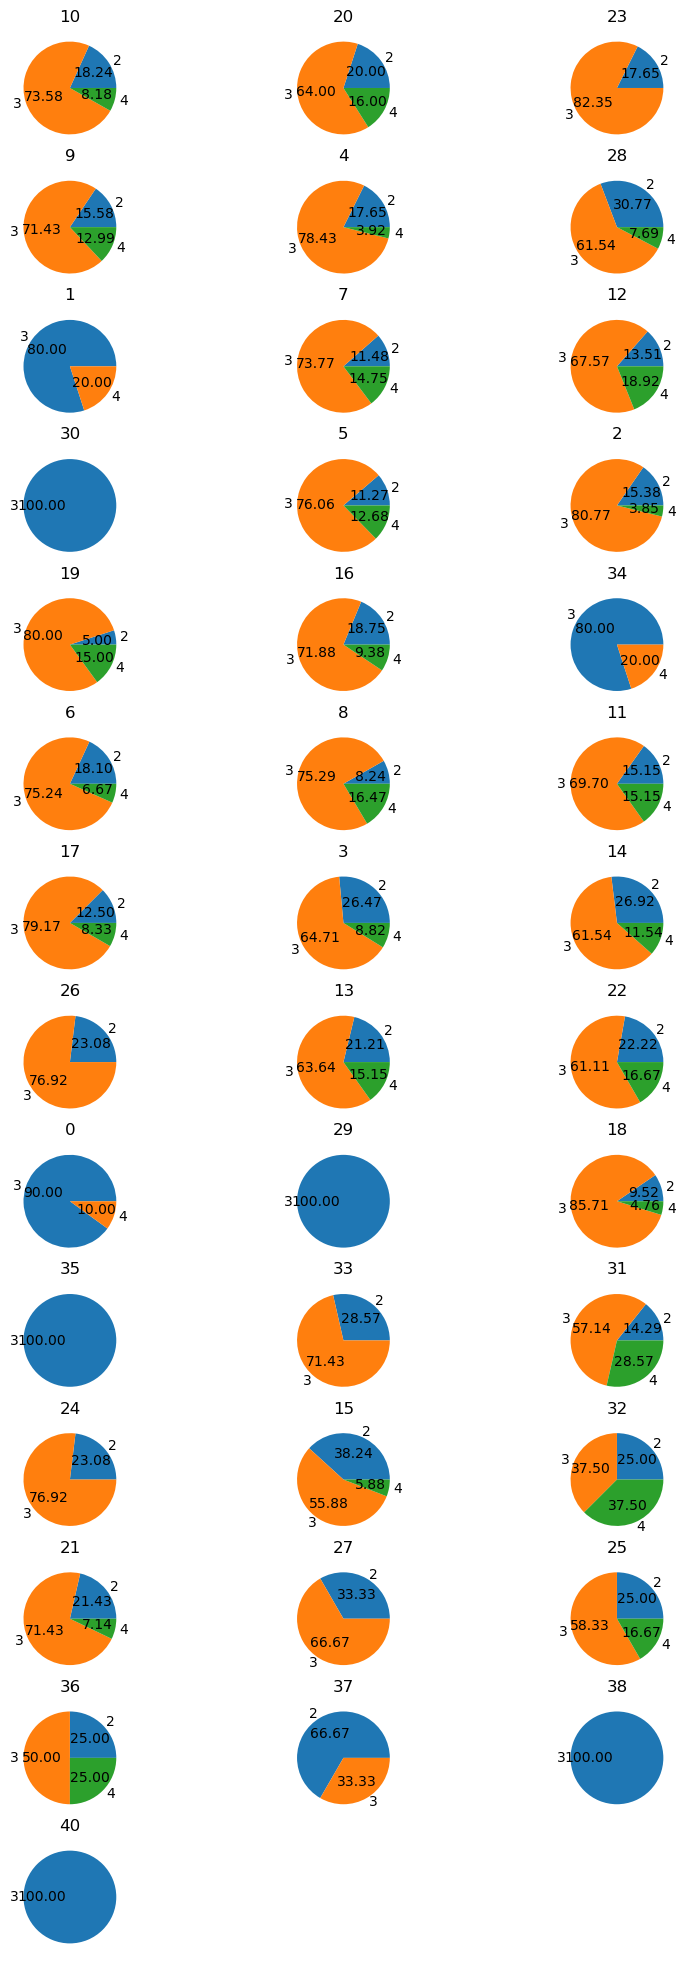

In [26]:
plt.figure(figsize=(10,25))
plt_num = 1
for i in data.TotalWorkExperienceInYears.unique():
    plt.subplot(math.ceil(len(data.TotalWorkExperienceInYears.unique())/3),3,plt_num)
    plt.pie(data.loc[data.TotalWorkExperienceInYears == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.TotalWorkExperienceInYears== i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

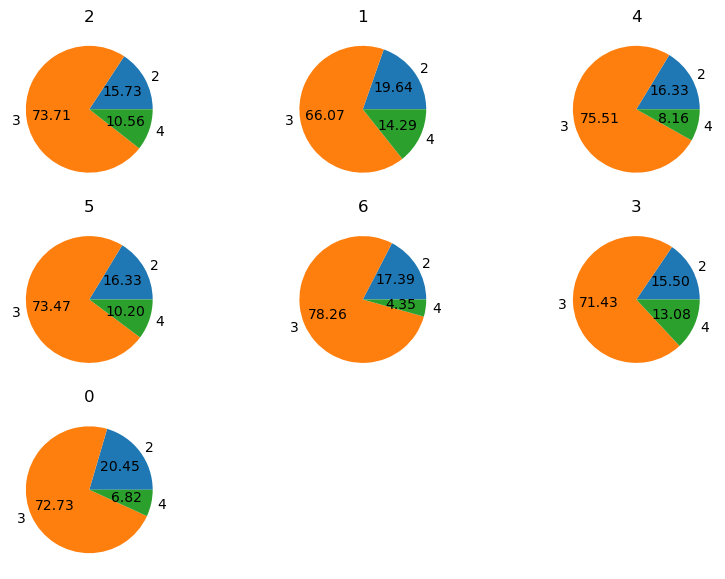

In [27]:
plt.figure(figsize=(10,7))
plt_num = 1
for i in data.TrainingTimesLastYear.unique():
    plt.subplot(math.ceil(len(data.TrainingTimesLastYear.unique())/3),3,plt_num)
    plt.pie(data.loc[data.TrainingTimesLastYear == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.TrainingTimesLastYear== i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

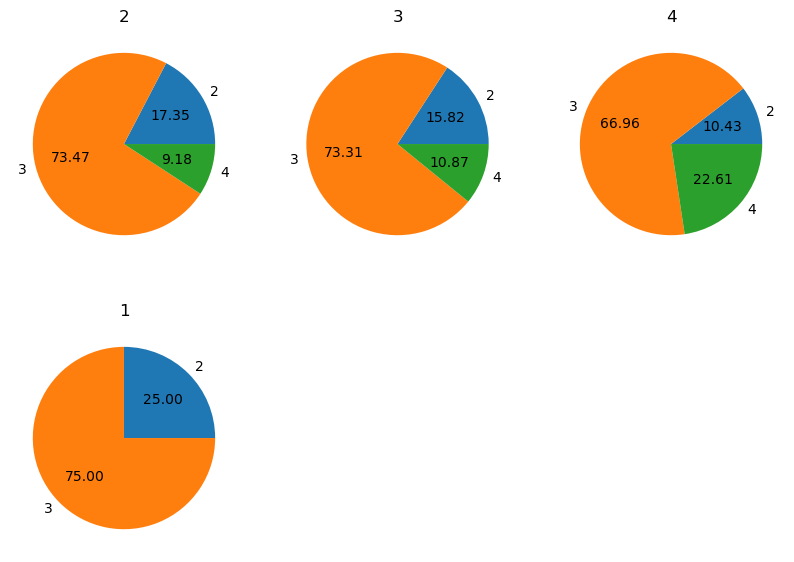

In [28]:
plt.figure(figsize=(10,7))
plt_num = 1
for i in data.EmpWorkLifeBalance.unique():
    plt.subplot(math.ceil(len(data.EmpWorkLifeBalance.unique())/3),3,plt_num)
    plt.pie(data.loc[data.EmpWorkLifeBalance == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.EmpWorkLifeBalance== i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

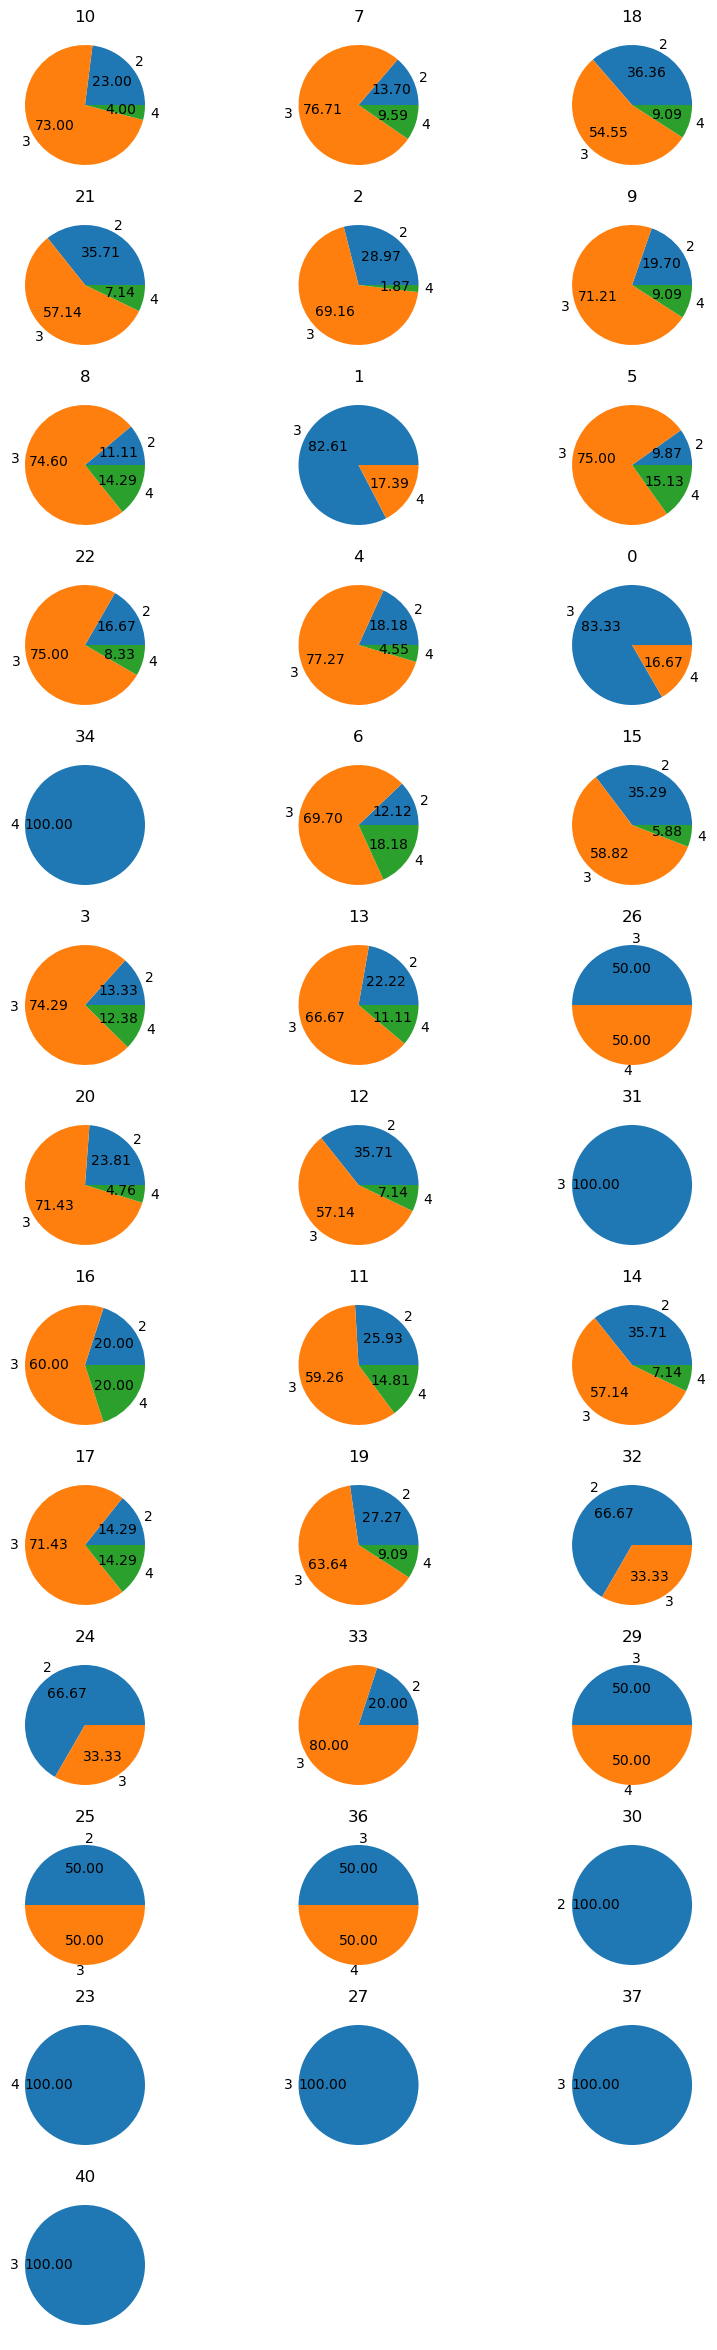

In [29]:
plt.figure(figsize=(10,30))
plt_num = 1
for i in data.ExperienceYearsAtThisCompany.unique():
    plt.subplot(math.ceil(len(data.ExperienceYearsAtThisCompany.unique())/3),3,plt_num)
    plt.pie(data.loc[data.ExperienceYearsAtThisCompany == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.ExperienceYearsAtThisCompany== i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

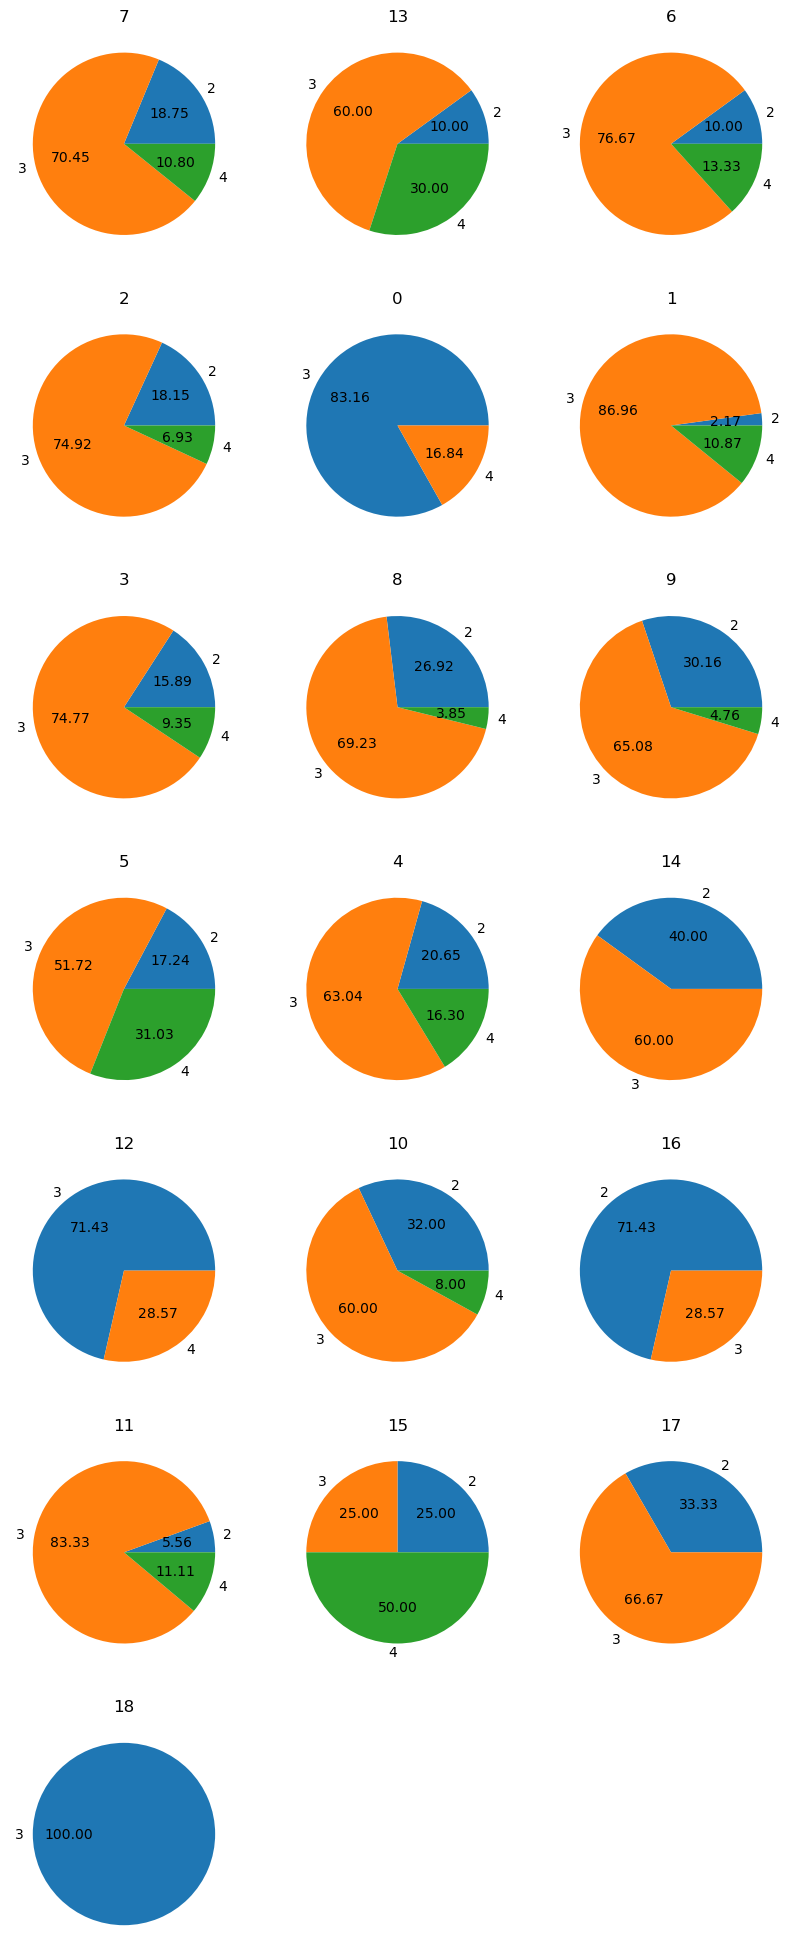

In [30]:
plt.figure(figsize=(10,25))
plt_num = 1
for i in data.ExperienceYearsInCurrentRole.unique():
    plt.subplot(math.ceil(len(data.ExperienceYearsInCurrentRole.unique())/3),3,plt_num)
    plt.pie(data.loc[data.ExperienceYearsInCurrentRole== i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.ExperienceYearsInCurrentRole== i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

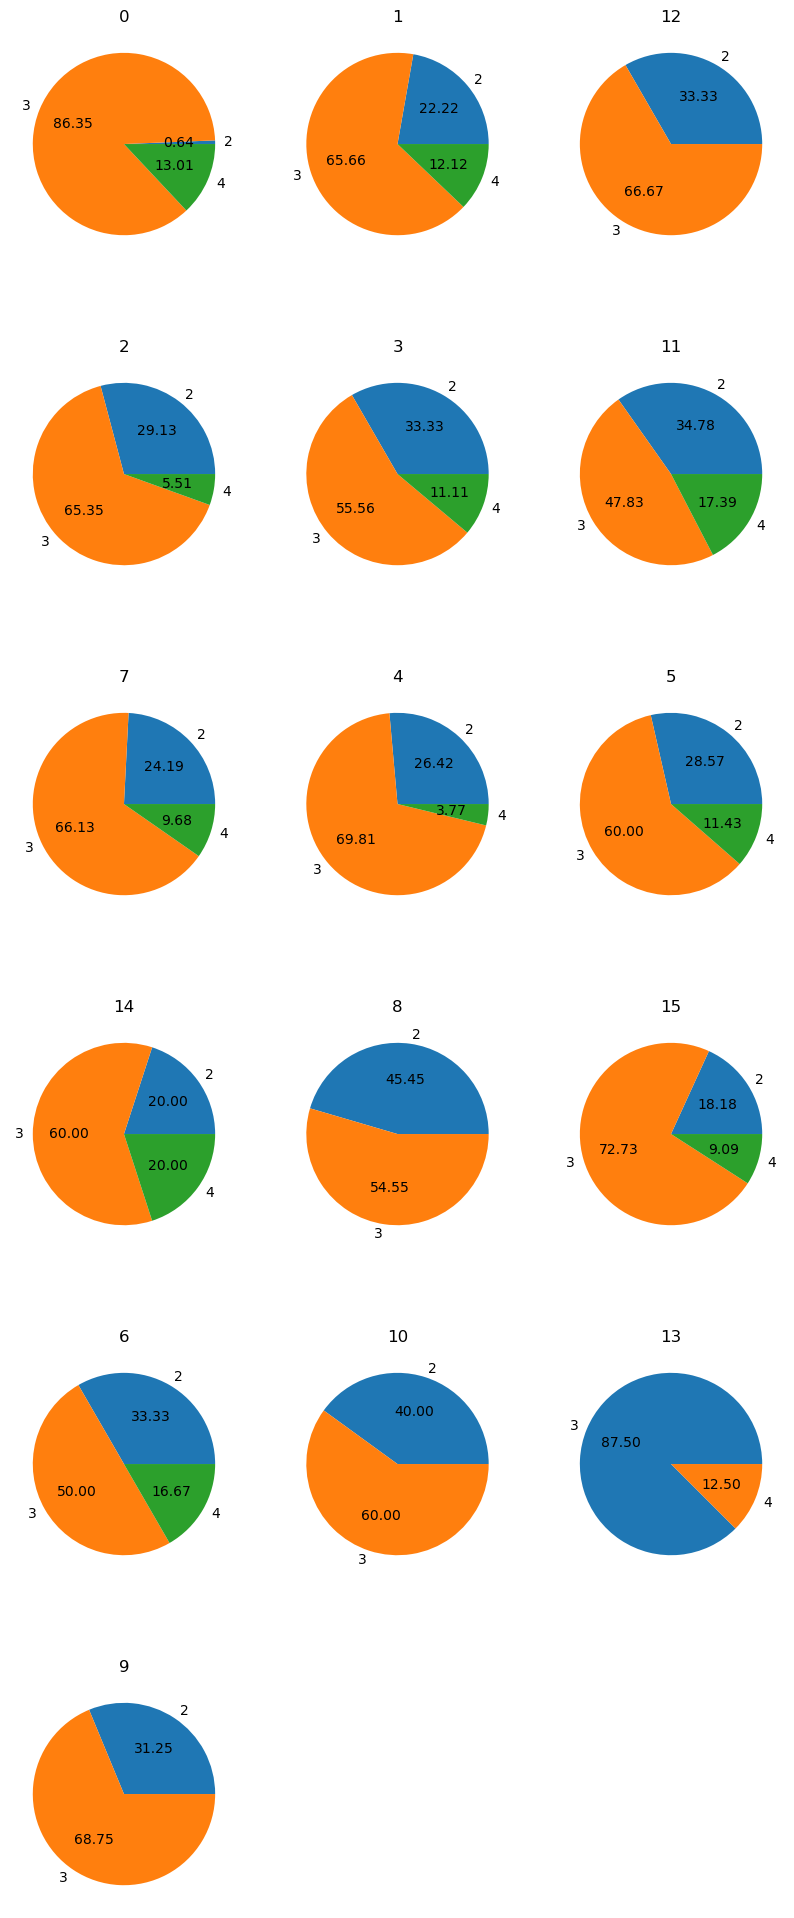

In [31]:
plt.figure(figsize=(10,25))
plt_num = 1
for i in data.YearsSinceLastPromotion.unique():
    plt.subplot(math.ceil(len(data.YearsSinceLastPromotion.unique())/3),3,plt_num)
    plt.pie(data.loc[data.YearsSinceLastPromotion == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.YearsSinceLastPromotion== i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

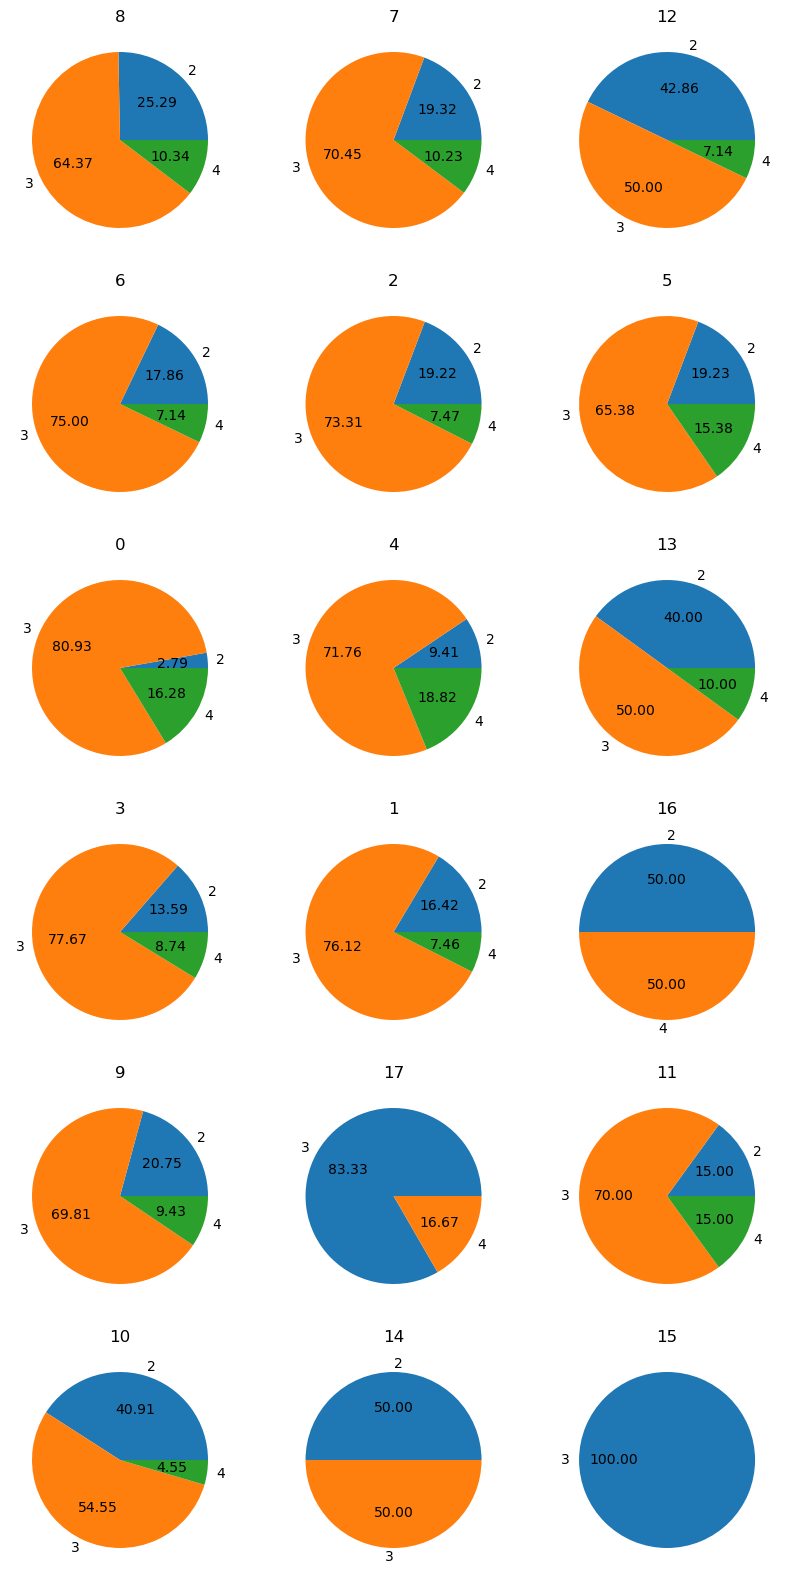

In [32]:
plt.figure(figsize=(10,20))
plt_num = 1
for i in data.YearsWithCurrManager.unique():
    plt.subplot(math.ceil(len(data.YearsWithCurrManager.unique())/3),3,plt_num)
    plt.pie(data.loc[data.YearsWithCurrManager == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.YearsWithCurrManager== i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

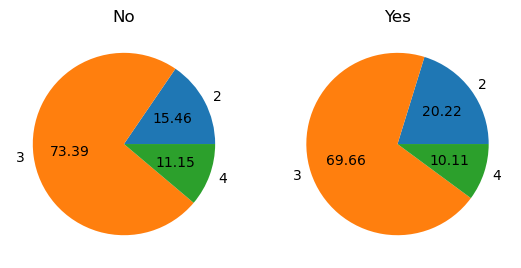

In [33]:
plt.figure(figsize=(10,7))
plt_num = 1
for i in data.Attrition.unique():
    plt.subplot(math.ceil(len(data.Attrition.unique())/3),3,plt_num)
    plt.pie(data.loc[data.Attrition == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.Attrition== i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

In [34]:
#Dropping emp id
data.drop('EmpNumber',axis=1,inplace=True)

In [35]:
#Gender column we'll do onehot encoding, since gender values are not ordinal
data['Male'] = pd.get_dummies(data['Gender'])['Male']
data['Female'] = pd.get_dummies(data['Gender'])['Female']
data.drop('Gender',axis=1,inplace=True)

In [36]:
#Label encoding or manual encoding as applicable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.MaritalStatus=le.fit_transform(data.MaritalStatus)
data.EducationBackground = le.fit_transform(data.EducationBackground)
data.EmpJobRole = le.fit_transform(data.EmpJobRole)
data.EmpDepartment = le.fit_transform(data.EmpDepartment)
data.BusinessTravelFrequency = data.BusinessTravelFrequency.map({'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':0})
data.OverTime = data.OverTime.map({'No':0,'Yes':1})
data.Attrition = data.Attrition.map({'No':0,'Yes':1})

In [37]:
#Checking if all datatypes are numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           1200 non-null   int64
 1   EducationBackground           1200 non-null   int64
 2   MaritalStatus                 1200 non-null   int64
 3   EmpDepartment                 1200 non-null   int64
 4   EmpJobRole                    1200 non-null   int64
 5   BusinessTravelFrequency       1200 non-null   int64
 6   DistanceFromHome              1200 non-null   int64
 7   EmpEducationLevel             1200 non-null   int64
 8   EmpEnvironmentSatisfaction    1200 non-null   int64
 9   EmpHourlyRate                 1200 non-null   int64
 10  EmpJobInvolvement             1200 non-null   int64
 11  EmpJobLevel                   1200 non-null   int64
 12  EmpJobSatisfaction            1200 non-null   int64
 13  NumCompaniesWorked            120

In [38]:
#Now that all columns are numerical, we shall observe correlation.
data.corr()

Age  EducationBackground  MaritalStatus  \
Age                           1.000000            -0.055905      -0.098368   
EducationBackground          -0.055905             1.000000      -0.001097   
MaritalStatus                -0.098368            -0.001097       1.000000   
EmpDepartment                -0.000104            -0.026874       0.067272   
EmpJobRole                   -0.037665            -0.012325       0.038023   
BusinessTravelFrequency      -0.011196            -0.008458       0.026075   
DistanceFromHome              0.020937            -0.013919      -0.019148   
EmpEducationLevel             0.207313            -0.047978       0.026737   
EmpEnvironmentSatisfaction    0.013814             0.045028      -0.032467   
EmpHourlyRate                 0.062867            -0.030234      -0.013540   
EmpJobInvolvement             0.027216            -0.025505      -0.043355   
EmpJobLevel                   0.509139            -0.056338      -0.087359   
EmpJobSatisfaction           -0.002436            -0.030977       0.044593   
NumCompaniesWorked            0.284408            -0.032879      -0.030095   
OverTime                      0.051910             0.007046      -0.022833   
EmpLastSalaryHikePercent     -0.006105            -0.009788       0.010128   
EmpRelationshipSatisfaction   0.049749             0.005652       0.026410   
TotalWorkExperienceInYears    0.680886            -0.027929      -0.093537   
TrainingTimesLastYear        -0.016053             0.051596       0.026045   
EmpWorkLifeBalance           -0.019563             0.022890       0.014154   
ExperienceYearsAtThisCompany  0.318852            -0.009887      -0.075728   
ExperienceYearsInCurrentRole  0.217163            -0.003215      -0.076663   
YearsSinceLastPromotion       0.228199             0.014277      -0.052951   
YearsWithCurrManager          0.205098             0.002767      -0.061908   
Attrition                    -0.189317             0.027161       0.162969   
PerformanceRating            -0.040164             0.005607       0.024172   
Male                         -0.040107             0.009922      -0.042169   
Female                        0.040107            -0.009922       0.042169   

                              EmpDepartment  EmpJobRole  \
Age                               -0.000104   -0.037665   
EducationBackground               -0.026874   -0.012325   
MaritalStatus                      0.067272    0.038023   
EmpDepartment                      1.000000    0.568973   
EmpJobRole                         0.568973    1.000000   
BusinessTravelFrequency           -0.015846   -0.048414   
DistanceFromHome                   0.007707    0.022939   
EmpEducationLevel                  0.019175   -0.016792   
EmpEnvironmentSatisfaction        -0.019237    0.044612   
EmpHourlyRate                      0.003957   -0.016179   
EmpJobInvolvement                 -0.076988   -0.008034   
EmpJobLevel                        0.100526    0.004406   
EmpJobSatisfaction                 0.007150    0.032916   
NumCompaniesWorked                -0.033950   -0.009111   
OverTime                          -0.026841    0.015075   
EmpLastSalaryHikePercent          -0.012661    0.005735   
EmpRelationshipSatisfaction       -0.050286   -0.043067   
TotalWorkExperienceInYears         0.016065   -0.049529   
TrainingTimesLastYear              0.016438    0.004452   
EmpWorkLifeBalance                 0.068875   -0.007519   
ExperienceYearsAtThisCompany       0.047677   -0.009047   
ExperienceYearsInCurrentRole       0.069602    0.019383   
YearsSinceLastPromotion            0.052315    0.012190   
YearsWithCurrManager               0.033850   -0.004504   
Attrition                          0.048006    0.037508   
PerformanceRating                 -0.162615   -0.096209   
Male                              -0.010925    0.011332   
Female                             0.010925   -0.011332   

                              BusinessTravelFrequency  Dista

<AxesSubplot:>

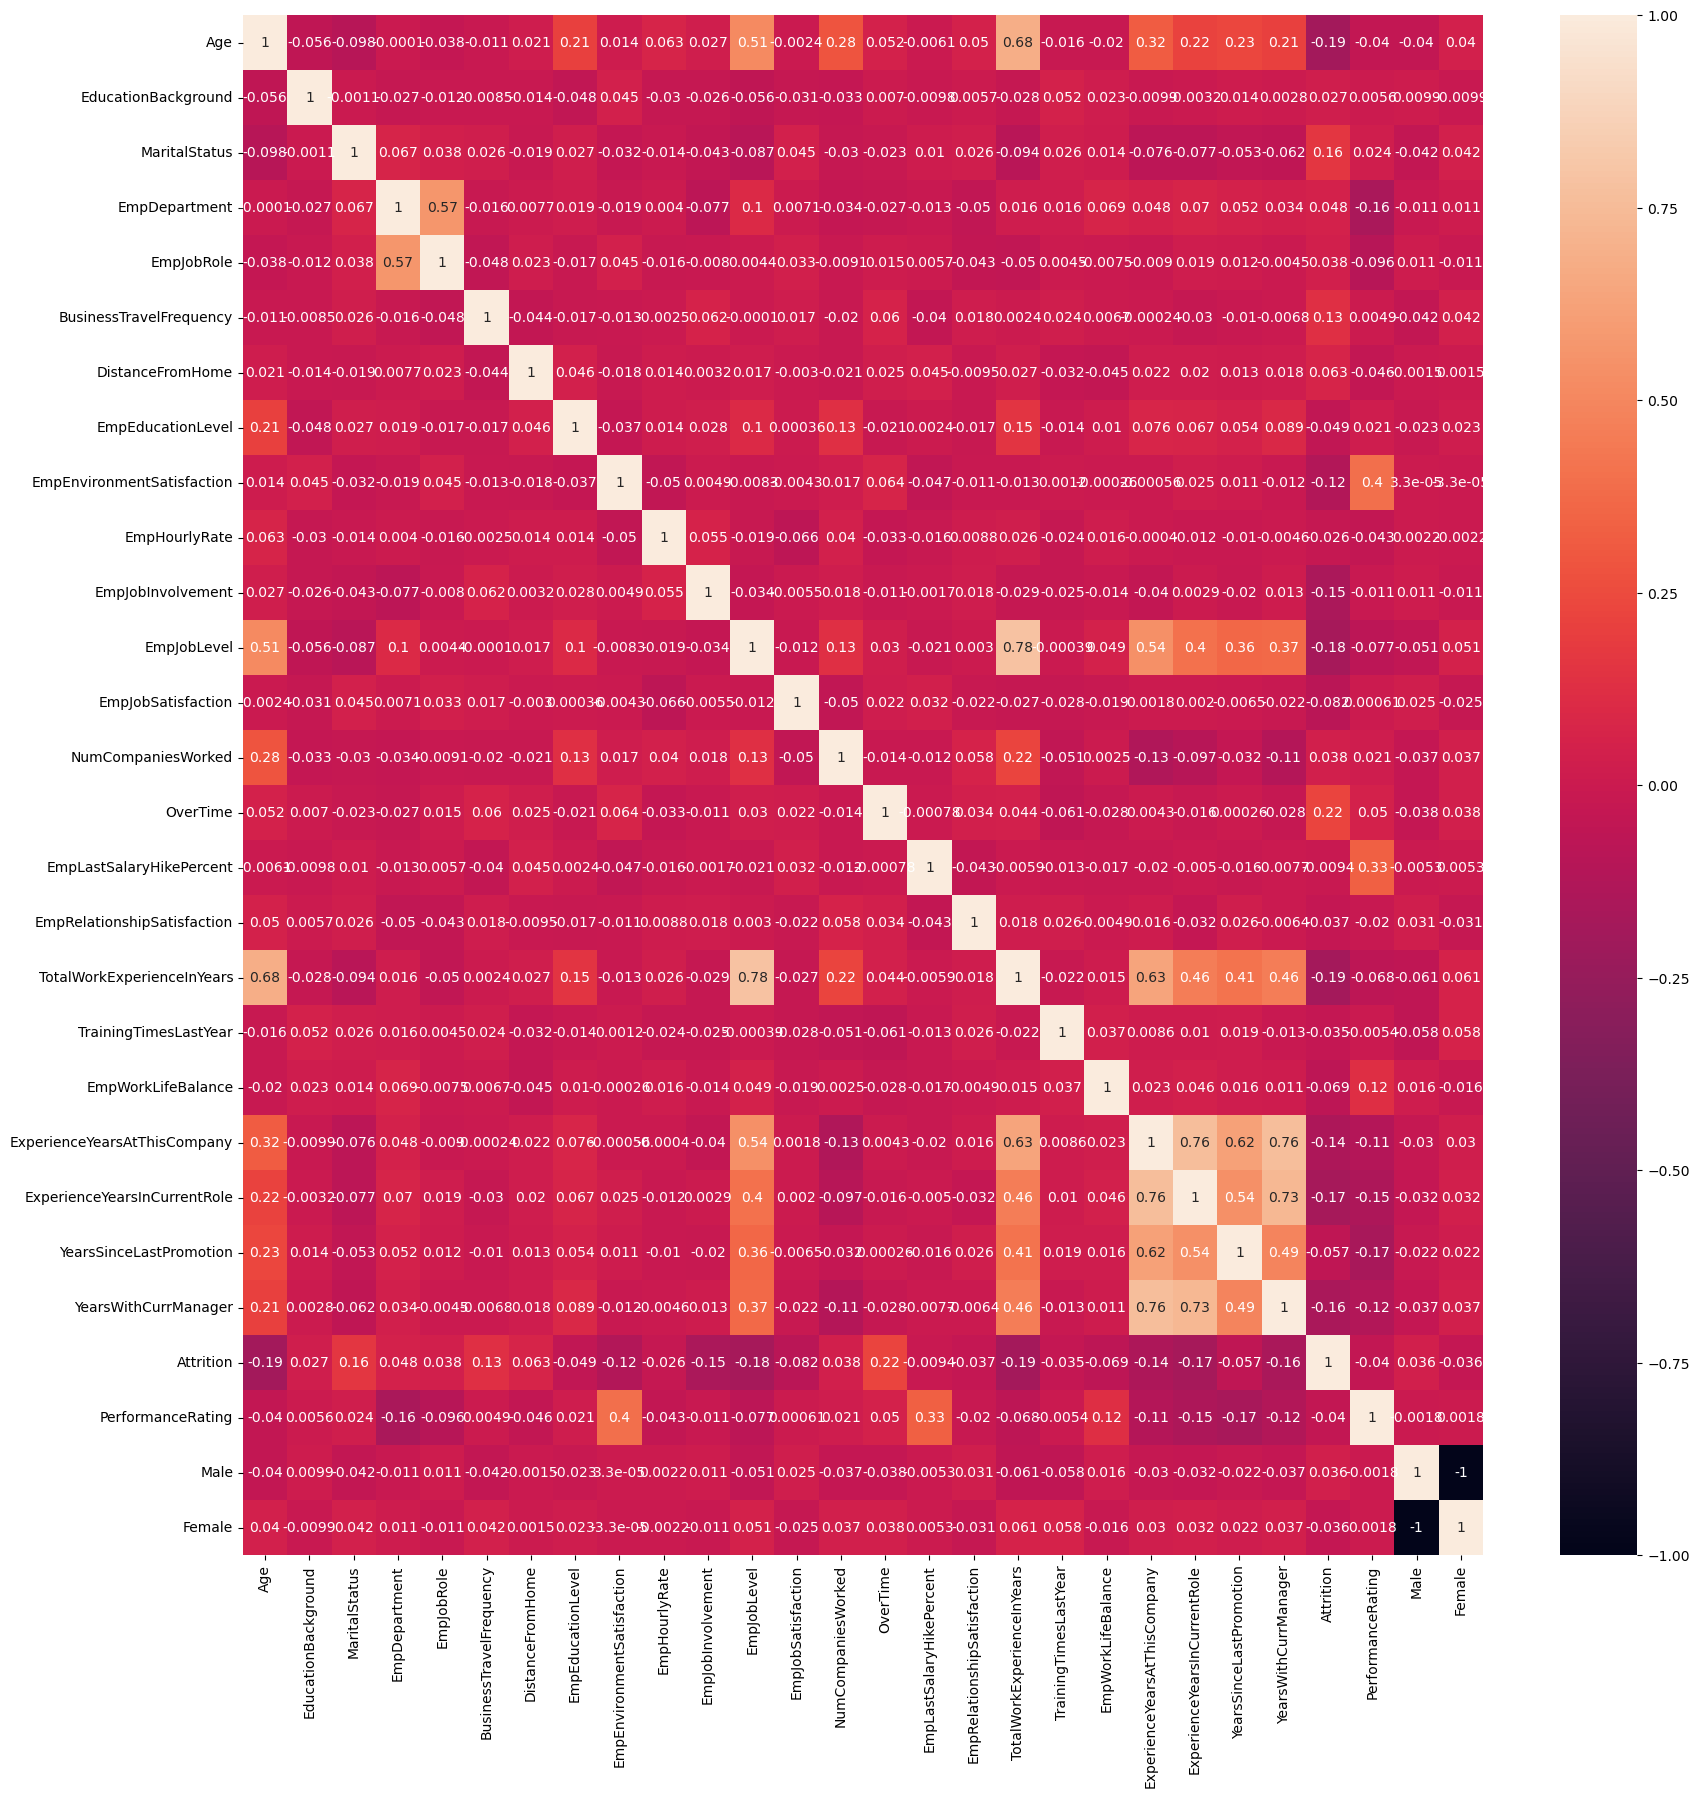

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)